# Anaemia Prediction Using Machine Learning

*Anemia prediction using machine learning involves developing and deploying models that can accurately identify individuals who are likely to be anemic based on various input features or biomarkers. These features might include demographic data (age, gender), physiological measurements (hemoglobin levels, red blood cell count), lifestyle factors, and medical history. The goal is to predict whether a person has anemia or not, aiding in early detection and treatment.*

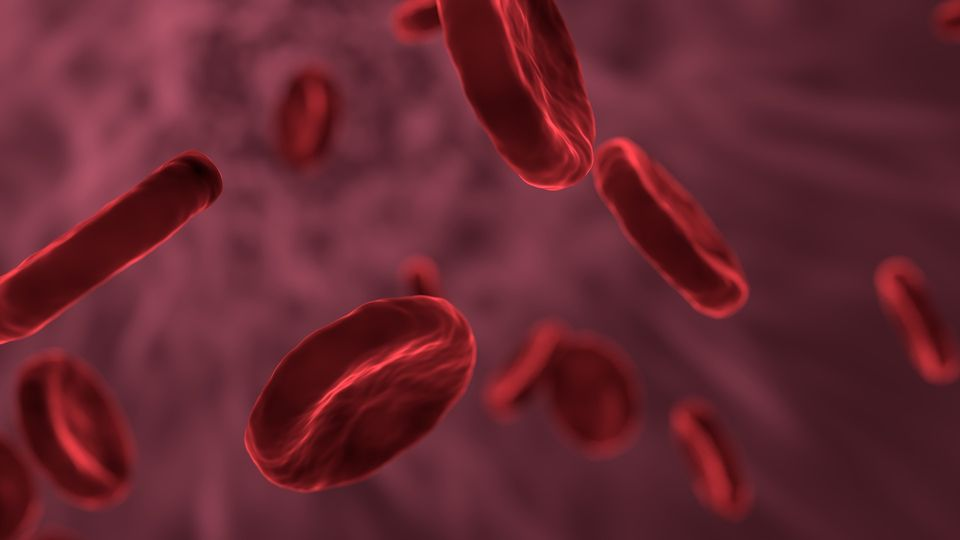

# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import plotly.express as px

import warnings
warnings.filterwarnings(category=UserWarning,action='ignore')

# Data Collection

In [35]:
data=pd.read_excel('Anaemia.xlsx','Anaemia')

df=pd.DataFrame(data)
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


# Data Pre-Processing

In [36]:
df=df.drop(['Number'],axis='columns')
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [37]:
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
df.Anaemic=le.fit_transform(df.Anaemic)
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,2,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,1,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,3,43.2870,30.6972,26.0158,12.4,0


In [38]:
x=df.drop(['Anaemic'],axis='columns')
x.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,2,43.2555,30.8421,25.9025,6.3
1,0,45.6033,28.1900,26.2067,13.5
2,1,45.0107,28.9677,26.0215,11.7
3,0,44.5398,28.9899,26.4703,13.5
4,3,43.2870,30.6972,26.0158,12.4


In [39]:
y=df.Anaemic
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Anaemic, dtype: int32

# Model Training and Testing

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

le=LogisticRegression()
model=le.fit(xtrain,ytrain)
model

LogisticRegression()

In [41]:
model.score(xtest,ytest)

0.9523809523809523

In [42]:
model.predict([[0,44.5398,28.9899,26.4703,13.5]])

array([0])

# Visualization

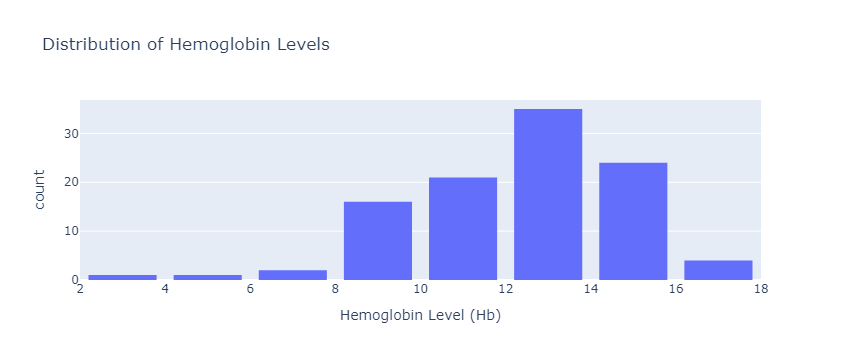

In [45]:
# 1. Distribution of Hemoglobin Levels (Hb)

fig=px.histogram(df, x='Hb', nbins=10, title='Distribution of Hemoglobin Levels',
                   labels={'Hb': 'Hemoglobin Level (Hb)', 'count': 'Frequency'})
fig.update_layout(bargap=0.2) 
fig.show()

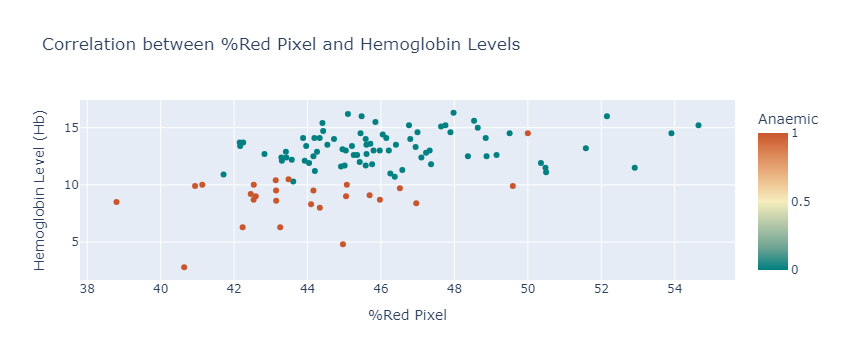

In [51]:
# 2. Correlation between %Red Pixel and Hb
fig = px.scatter(df, x='%Red Pixel', y='Hb', color='Anaemic', title='Correlation between %Red Pixel and Hemoglobin Levels',
                 labels={'%Red Pixel': '%Red Pixel', 'Hb': 'Hemoglobin Level (Hb)', 'Anaemic': 'Anaemic'},
                 color_continuous_scale='geyser')
fig.show()

# Great Job...!!!